# Wastewater COVID-19 State and Territory Trends Export Tool

Write a script that throws together a csv of the state level data with columns time_value, lowercase state code geo_value, and one /several of the signals e.g. state_med_conc, or activity_level.

In [2]:
from datetime import datetime as dt
from urllib.request import urlopen
import pandas as pd
import numpy as np
import json

In [3]:
# Pull JSON from Trend Over Time link on CDC web page below
# https://www.cdc.gov/nwss/rv/COVID19-statetrend.html
response = urlopen('https://www.cdc.gov/wcms/vizdata/NCEZID_DIDRI/NWSSStateLevel.json')
json_data = response.read()
json_data = json.loads(json_data)
df = pd.json_normalize(json_data)

# date_period is literally just duplicated data filtered by 1 year, 9 Months, 45 Days, or all data avaliable
df = df[df['date_period'] == 'All Results']
df.activity_level = df.activity_level.replace('No Data', np.nan)

# State abbreviation crosswalk
df_states = pd.read_csv('./data/states.csv')
df_states.Abbreviation = df_states.Abbreviation.str.lower()
df_states

df = pd.merge(df, df_states, on=['State'])
df.rename(columns={'Abbreviation': 'geo_value', 'date': 'time_value'}, inplace=True)

# convert values for graphs below
df.time_value = pd.to_datetime(df.time_value)
df.state_med_conc = df.state_med_conc.astype(np.float64)
df.activity_level = df.activity_level.astype(np.float64)
df.region_value = df.region_value.astype(np.float64)
df.national_value = df.national_value.astype(np.float64)

df = df[['time_value', 'geo_value', 'state_med_conc', 'activity_level', 'region_value', 'national_value']]
file_name = f'./data/nwss_covid_{dt.today().strftime("%Y%m%d")}.csv'
df.to_csv(file_name, index=False)
df

,time_value,geo_value,state_med_conc,activity_level,region_value,national_value
0,2024-02-17,al,9.153986,9.0,8.932922,6.552186
1,2022-12-24,al,10.347337,9.0,9.910576,9.456410
2,2022-10-29,al,2.468802,4.0,2.735003,4.029489
3,2022-08-20,al,7.302713,8.0,6.460795,6.789899
4,2023-09-09,al,6.842084,8.0,6.656504,6.235872
...,...,...,...,...,...,...
6969,2024-02-17,wy,5.355381,7.0,5.697578,6.552186
6970,2023-05-06,wy,0.883659,1.0,2.552135,2.049387
6971,2024-05-04,wy,1.182635,2.0,1.234891,1.331254
6972,2023-02-11,wy,2.601590,4.0,6.698849,6.074212


## Quick sanity check graphs

<Axes: xlabel='time_value', ylabel='national_value'>

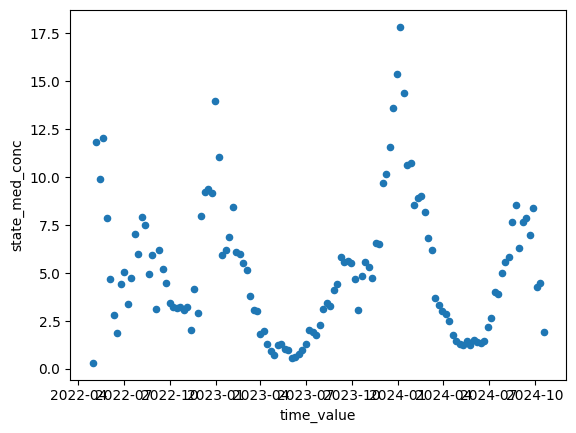

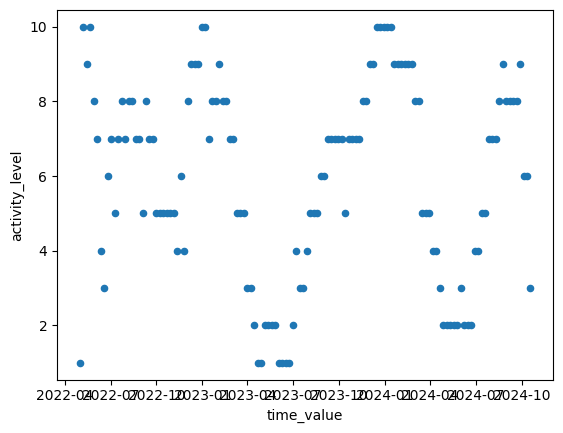

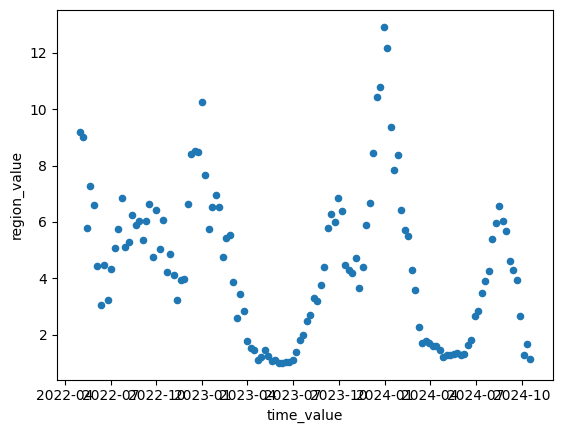

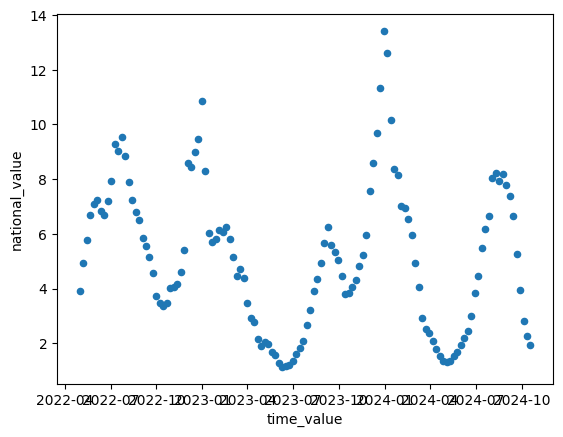

In [135]:
df[df['geo_value']=='pa'].plot(x='time_value', y='state_med_conc', kind='scatter')
df[df['geo_value']=='pa'].plot(x='time_value', y='activity_level', kind='scatter')
df[df['geo_value']=='pa'].plot(x='time_value', y='region_value', kind='scatter')
df[df['geo_value']=='pa'].plot(x='time_value', y='national_value', kind='scatter')

In [148]:
df.shape[0]

6974